In [1]:
from planning_through_contact.geometry.collision_geometry.box_2d import Box2d
from planning_through_contact.geometry.rigid_body import RigidBody
from planning_through_contact.planning.planar.planar_plan_config import ContactCostType, PlanarPlanConfig, SliderPusherSystemConfig
from planning_through_contact.geometry.collision_geometry.collision_geometry import ContactLocation, PolytopeContactLocation
from planning_through_contact.geometry.planar.face_contact import FaceContactMode
from planning_through_contact.geometry.planar.planar_pose import PlanarPose
from planning_through_contact.geometry.planar.planar_pushing_trajectory import PlanarPushingTrajectory
from planning_through_contact.geometry.planar.trajectory_builder import PlanarTrajectoryBuilder
from planning_through_contact.visualize.planar_pushing import visualize_planar_pushing_trajectory
from planning_through_contact.planning.planar.planar_plan_config import PlanarPushingStartAndGoal
from planning_through_contact.visualize.analysis import analyze_mode_result
from planning_through_contact.planning.planar.planar_plan_config import ContactCost
from planning_through_contact.planning.planar.planar_plan_config import ContactConfig
from planning_through_contact.visualize.analysis import analyze_plan
from planning_through_contact.visualize.planar_pushing import compare_trajs
from planning_through_contact.planning.planar.planar_plan_config import NonCollisionCost, PlanarSolverParams

from pydrake.solvers import MosekSolver
from pydrake.solvers import ClarabelSolver
from pydrake.solvers import SnoptSolver, SolverOptions
from IPython.display import HTML, SVG, display

clarabel = ClarabelSolver() # Clarabel seems to be ~10x slower than Mosek
mosek = MosekSolver()
snopt = SnoptSolver()

In [2]:
# Define slider
from planning_through_contact.experiments.utils import get_default_plan_config, get_default_solver_params, get_sugar_box, get_tee
from planning_through_contact.experiments.ablation_study.planar_pushing_ablation import do_one_run, do_one_run_get_path

config = get_default_plan_config(slider_type="sugar_box")
solver_params = get_default_solver_params()

In [3]:
# slider_initial_pose = PlanarPose(-0.3, 0.05, 0.2)
# slider_final_pose = PlanarPose(0.0, 0.0, 0.0)
# pusher_initial_pose = PlanarPose(-0.5, 0.0, 0.0)
# pusher_final_pose = PlanarPose(-0.5, 0.0, 0.0)
# start_and_goal = PlanarPushingStartAndGoal(slider_initial_pose, slider_final_pose, pusher_initial_pose, pusher_final_pose)
# 
# run, path = do_one_run_get_path(config, solver_params, start_and_goal)
# 
# print(run)
# traj = path.to_traj()
# display(HTML(visualize_planar_pushing_trajectory(traj).to_jshtml()))
# analyze_plan(path)
# rounded_traj = path.to_traj(do_rounding=True, solver_params=solver_params)
# display(HTML(visualize_planar_pushing_trajectory(rounded_traj).to_jshtml()))
# analyze_plan(path, rounded=True)
# compare_trajs(traj, rounded_traj)

In [4]:
slider_initial_pose = PlanarPose(-0.3, 0.3, 1.7)
slider_final_pose = PlanarPose(0.0, 0.0, 0.0)
pusher_initial_pose = PlanarPose(-0.5, 0.0, 0.0)
pusher_final_pose = PlanarPose(-0.5, 0.0, 0.0)
start_and_goal = PlanarPushingStartAndGoal(slider_initial_pose, slider_final_pose, pusher_initial_pose, pusher_final_pose)

In [5]:
config.contact_config.cost.lin_velocity_regularization = 2.0
config.contact_config.cost.ang_velocity_regularization = 10.0
config.contact_config.cost.force_regularization = 0.01
run_1, path_1 = do_one_run_get_path(config, solver_params, start_and_goal)

config.contact_config.cost.lin_velocity_regularization = 2.0
config.contact_config.cost.ang_velocity_regularization = 10.0
config.contact_config.cost.force_regularization = None
run_2, path_2 = do_one_run_get_path(config, solver_params, start_and_goal)

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and no rounding.
INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials.
INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and no rounding.
INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials.


In [6]:
config.contact_config.cost.lin_velocity_regularization = None
config.contact_config.cost.ang_velocity_regularization = 10.0
config.contact_config.cost.force_regularization = None
run_3, path_3 = do_one_run_get_path(config, solver_params, start_and_goal)

config.contact_config.cost.lin_velocity_regularization = None
config.contact_config.cost.ang_velocity_regularization = None
config.contact_config.cost.force_regularization = None
run_4, path_4 = do_one_run_get_path(config, solver_params, start_and_goal)

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and no rounding.
INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials.
INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and no rounding.
INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=true and preprocessing=true and rounding.
INFO:drake:Finished 100 rounding trials.


sdp_cost: 25.337502829647065
rounded_cost: 25.37214057726315
relaxed_cost: 25.19440597558457
sdp_elapsed_time: 20.25786805152893
rounding_elapsed_time: 0.1257169246673584
relaxed_elapsed_time: 15.803313970565796
sdp_is_success: True
relaxed_is_success: True
rounded_is_success: True
relaxed_mean_determinant: 0.9999838761006418
rounded_mean_determinant: 1.0000000008257126
start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
config: start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
num_knot_points_contact: 3
num_knot_points_non_collision: 4
time_in_contact: 2.0
time_non_collision: 4.0
continuity_on_pusher_velocity: True
allow_teleportation: False
use_eq_elimination: False
use_ent

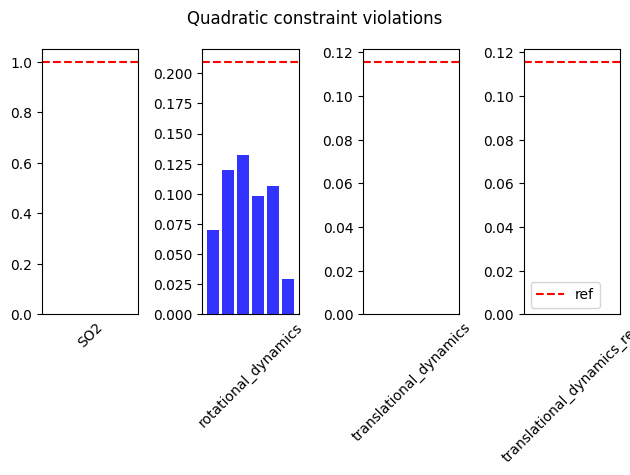

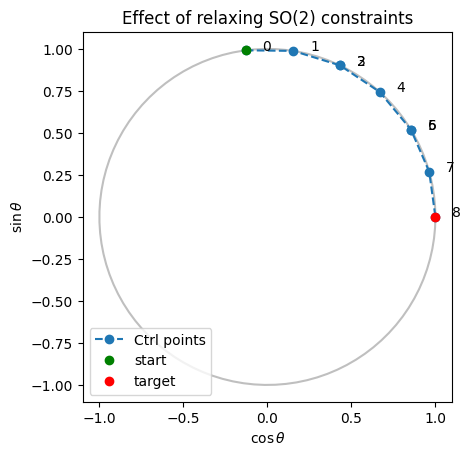

sdp_cost: 24.75526429152196
rounded_cost: 24.80046388615822
relaxed_cost: 24.436636807345195
sdp_elapsed_time: 21.53347396850586
rounding_elapsed_time: 0.09519720077514648
relaxed_elapsed_time: 17.40334916114807
sdp_is_success: True
relaxed_is_success: True
rounded_is_success: True
relaxed_mean_determinant: 0.9999847941971969
rounded_mean_determinant: 1.000000000012183
start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
config: start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
num_knot_points_contact: 3
num_knot_points_non_collision: 4
time_in_contact: 2.0
time_non_collision: 4.0
continuity_on_pusher_velocity: True
allow_teleportation: False
use_eq_elimination: False
use_entr

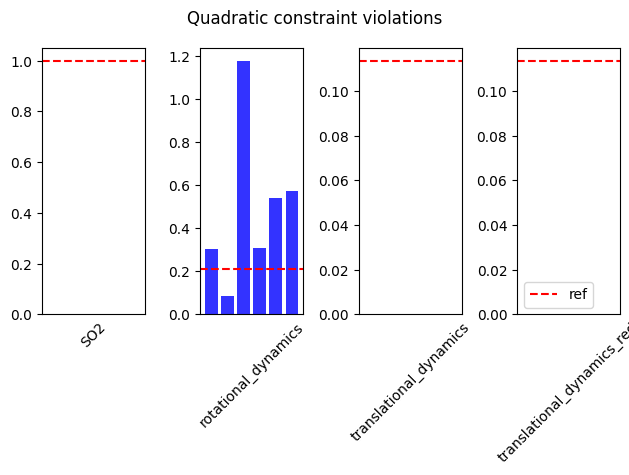

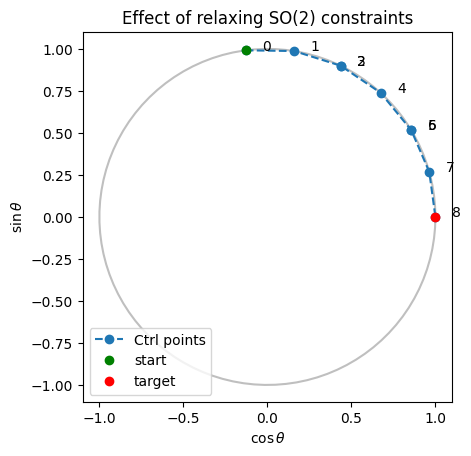

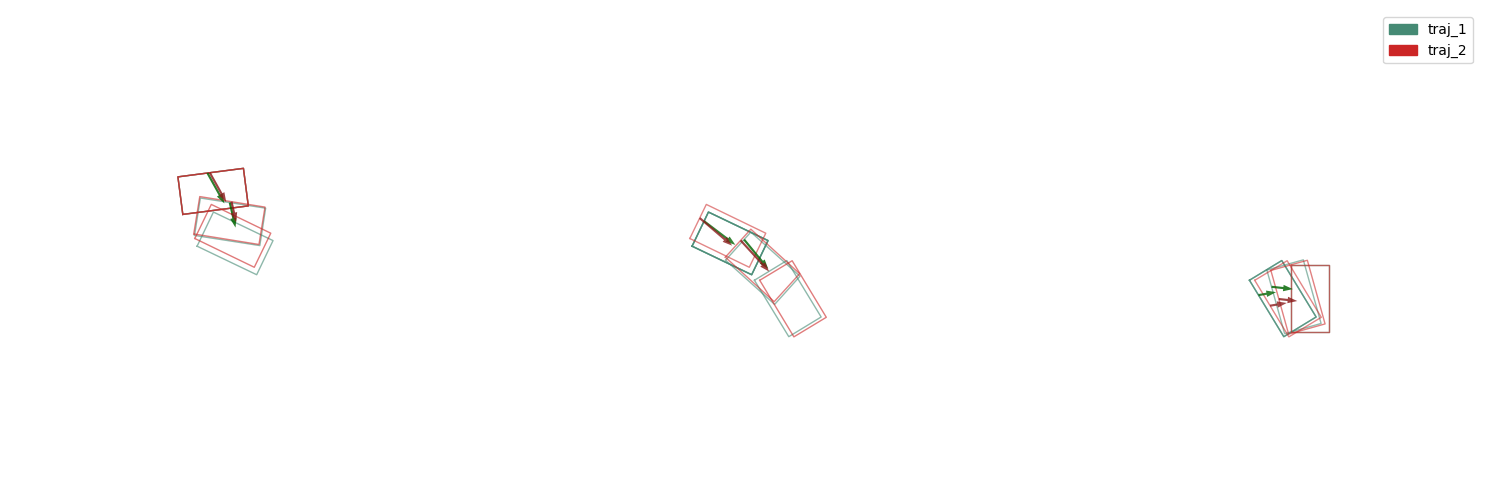

In [7]:
print(run_1)
traj_1 = path_1.to_traj()
#display(HTML(visualize_planar_pushing_trajectory(traj_1).to_jshtml()))
analyze_plan(path_1)

print(run_2)
traj_2 = path_2.to_traj()
#display(HTML(visualize_planar_pushing_trajectory(traj_2).to_jshtml()))
analyze_plan(path_2)

compare_trajs(traj_1, traj_2, traj_a_legend="traj_1", traj_b_legend="traj_2")

sdp_cost: 24.374338266517228
rounded_cost: 24.57176767803133
relaxed_cost: 23.939625621171974
sdp_elapsed_time: 21.47185516357422
rounding_elapsed_time: 0.11191463470458984
relaxed_elapsed_time: 19.201159954071045
sdp_is_success: True
relaxed_is_success: True
rounded_is_success: True
relaxed_mean_determinant: 0.9996150751442738
rounded_mean_determinant: 1.0000000000889502
start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
config: start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
num_knot_points_contact: 3
num_knot_points_non_collision: 4
time_in_contact: 2.0
time_non_collision: 4.0
continuity_on_pusher_velocity: True
allow_teleportation: False
use_eq_elimination: False
use_e

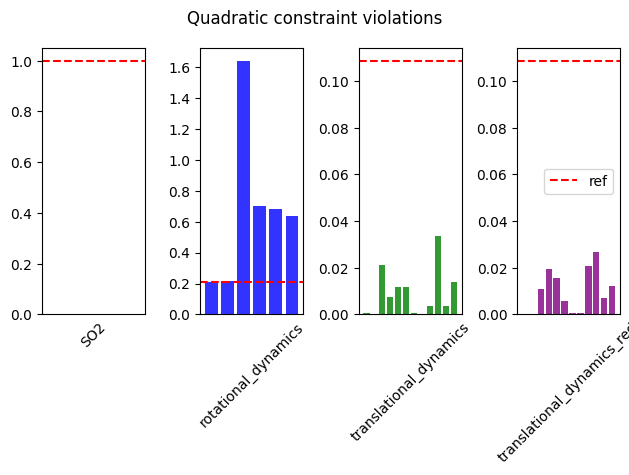

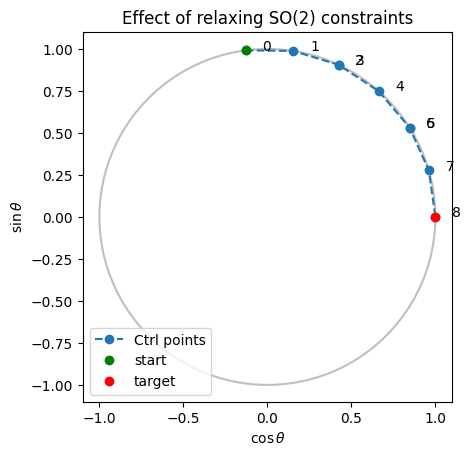

sdp_cost: 7.489075362061522
rounded_cost: 7.98651612198302
relaxed_cost: 7.478653669099642
sdp_elapsed_time: 12.719589233398438
rounding_elapsed_time: 0.037232160568237305
relaxed_elapsed_time: 12.692139863967896
sdp_is_success: True
relaxed_is_success: True
rounded_is_success: True
relaxed_mean_determinant: 0.9898440512089047
rounded_mean_determinant: 1.0000000000416314
start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
config: start_and_goal: slider_initial_pose: x: -0.3, y: 0.3, theta: 1.7
slider_target_pose: x: 0.0, y: 0.0, theta: 0.0
pusher_initial_pose: x: -0.5, y: 0.0, theta: 0.0
pusher_target_pose: x: -0.5, y: 0.0, theta: 0.0
num_knot_points_contact: 3
num_knot_points_non_collision: 4
time_in_contact: 2.0
time_non_collision: 4.0
continuity_on_pusher_velocity: True
allow_teleportation: False
use_eq_elimination: False
use_en

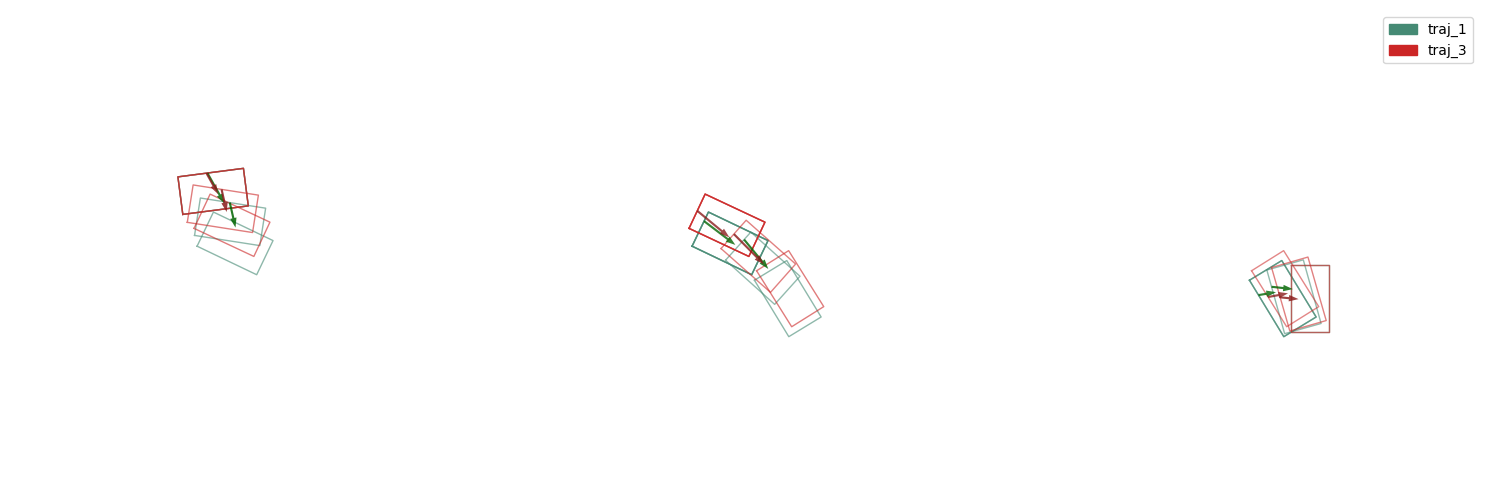

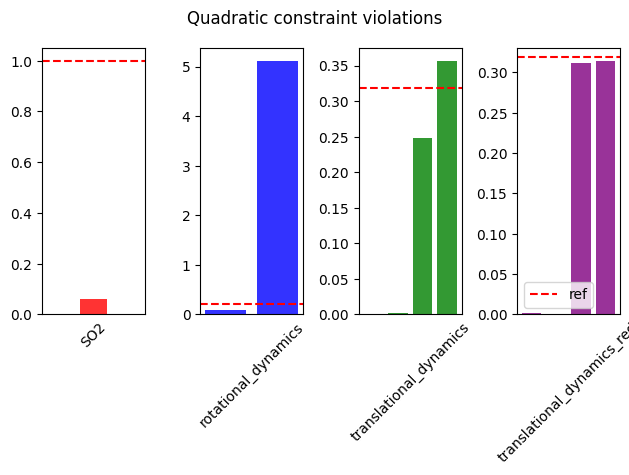

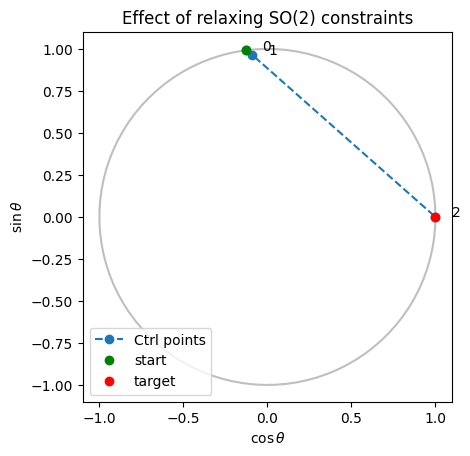

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

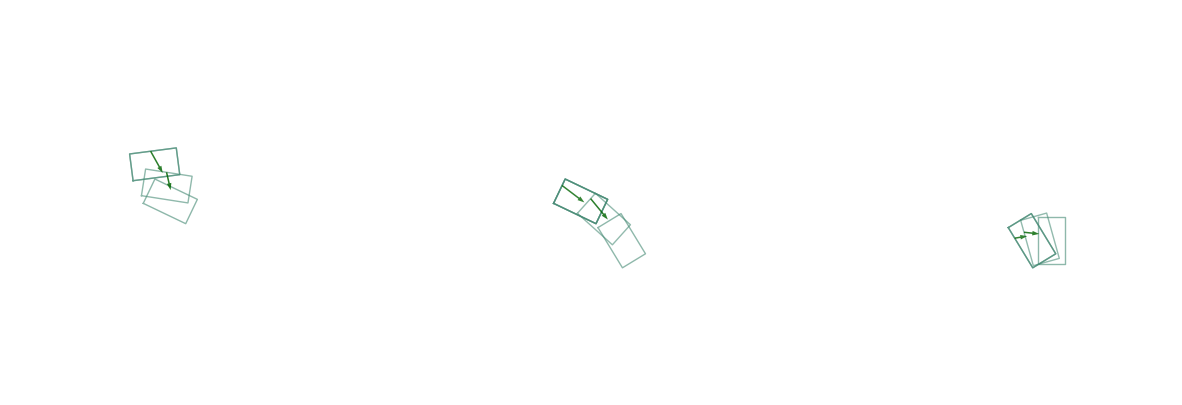

In [8]:
print(run_3)
traj_3 = path_3.to_traj()
#display(HTML(visualize_planar_pushing_trajectory(traj_1).to_jshtml()))
analyze_plan(path_3)
compare_trajs(traj_1, traj_3, traj_a_legend="traj_1", traj_b_legend="traj_3")

print(run_4)
traj_4 = path_4.to_traj()
#display(HTML(visualize_planar_pushing_trajectory(traj_2).to_jshtml()))
analyze_plan(path_4)
compare_trajs(traj_1, traj_4, traj_a_legend="traj_1", traj_b_legend="traj_4")

In [ ]:
display(HTML(visualize_planar_pushing_trajectory(traj_4).to_jshtml()))

In [ ]:
from planning_through_contact.visualize.planar_pushing import make_traj_figure

make_traj_figure(traj_4)